In [10]:
import numpy as np
from numpy.random import normal
from scipy.stats import norm
import matplotlib.pyplot as plt

In [52]:
def pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0,ytm1,S0,rf,q,k,T):

    delta = 0.25  # 0.25 years
    Ty = 252  # 252 days in a year
    dt = 1 / Ty  # 1 day
    price = 0  # price of the contract
    e_Sr=0 # expected Nikkei ratio
    e_L=0 # expected Linor rate
    L0= 0.052 # current 3 month libor ratio
    stockpaths=np.zeros((Num,T*Ty+1))
    stockpaths[:,0] = S0
    Liborpaths=np.zeros((Num,T*Ty+1))
    Liborpaths[:,0] = rf
    payoffhist=np.zeros(Num)
    pricehist=np.zeros(Num)
    Liborhist=np.zeros(Num)
    

    for i in range(Num):
        W1 = normal(0, 1, (T*Ty, 1))
        W2 = normal(0, 1, (T*Ty, 1))
        W3 = cor_sL*W1 + np.sqrt(1 - cor_sL**2)*W2
        
        for j in range(T*Ty):
            stockpaths[i,j+1] = stockpaths[i,j]*(1+(rf - q - cor_sx*sigma_s*sigma_x+cor_sL*sigma_s*sigma_L)*dt + sigma_s*np.sqrt(dt)*W1[j]) 
            Liborpaths[i,j+1] = Liborpaths[i,j]*(1+sigma_L*np.sqrt(dt)*W3[j])
               
        L = Liborpaths[i,j]
        Liborhist[i]=L
        
        payoff = max(0, (stockpaths[i,T*Ty]/S0-k)*(k-L/L0))
        discount = (1+ytm1/100)**T
        payoffhist[i]=payoff
        pricehist[i]=payoff*discount
        price += payoff*discount
        e_Sr += stockpaths[i,T*Ty]/S0
        e_L += L/L0
        
    print("Average simulated Nikkei ratio is:",e_Sr/Num)
    print("Average simulated LIBOR rate is:",e_L/Num)
    print("The price of the contract is:", price/Num)
    return(stockpaths,Liborpaths,payoffhist,pricehist,Liborhist)

In [53]:
# set params based on processed data
Num=1000
cor_sx = -0.15204482047169965  # correlation of Nikkei-225 return and exchange rate
sigma_x = 0.08235696458645585  # Annual Volatility of exchange rate USD/JPY
sigma_s = 0.1960546321639455 # Annual Volatility of Nikkey-225 return
sigma_L = 0.4206690514545634 #Annual Volatility of for libor
cor_sL = 0.5656345344805206  # correlation between equity and Libor rate
a = 0.03 #mean reversion parameter
ytm1=0.0373 #Yield to maturity 
S0 = 211.85 #current Nikkei price
rf = 0.03 #risk-free rate 
q = 0.019 #current Nikkei-225 dividend
L0=0.052 #initial Libor
k = 1  # strike price
T = 3  # Number of years
stockpaths,Liborpaths,payoffhist,pricehist,Liborhist=pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0, ytm1,S0,rf,q,k,T)

Average simulated Nikkei ratio is: 1.1993786211362407
Average simulated LIBOR rate is: 0.5846019786138446
The price of the contract is: 0.07772856739000873


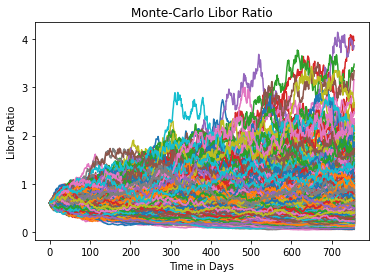

In [54]:
x_values = range(int(Liborpaths.size/len(Liborpaths)))

# Create a new figure and axis to plot on
fig, ax = plt.subplots()

# Plot the data as a line chart
for i in range(Num):
    ax.plot(x_values, Liborpaths[i]/0.05)

# Set the x-axis and y-axis labels
ax.set_xlabel('Time in Days')
ax.set_ylabel('Libor Ratio')
# Set the title of the chart
ax.set_title('Monte-Carlo Libor Ratio')
plt.savefig("'Monte-Carlo Libor Rate1.png")
# Show the chart
plt.show()

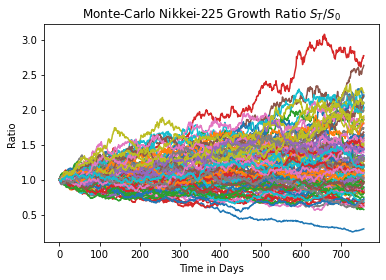

In [17]:
x_values = range(int(stockpaths.size/len(stockpaths)))

# Create a new figure and axis to plot on
fig, ax = plt.subplots()

# Plot the data as a line chart
for i in range(Num):
    ax.plot(x_values, stockpaths[i]/S0)

# Set the x-axis and y-axis labels
ax.set_xlabel('Time in Days')
ax.set_ylabel('Ratio')
# Set the title of the chart
ax.set_title('Monte-Carlo Nikkei-225 Growth Ratio $S_T/S_0$')

# Show the chart
plt.savefig("'Monte-Carlo Nikkei-225 Growth Ratio1.png")
plt.show()

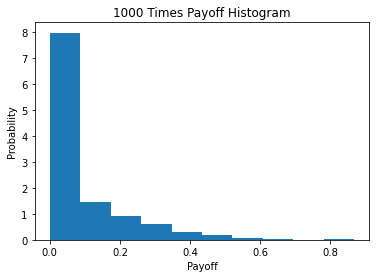

In [18]:
plt.hist(payoffhist, density=True, bins=10)
plt.title("1000 Times Payoff Histogram")
plt.ylabel('Probability')
plt.xlabel('Payoff')
plt.savefig("'1000 Times Payoff Histogram1.png")

Text(0.5, 0, 'Contract price')

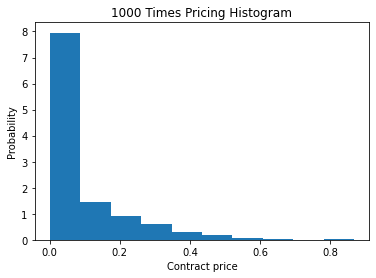

In [19]:
plt.hist(pricehist, density=True, bins=10)
plt.title("1000 Times Pricing Histogram")
plt.ylabel('Probability')
plt.xlabel('Contract price')

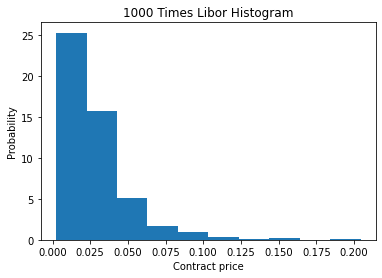

In [20]:
plt.hist(Liborhist, density=True, bins=10) 
plt.title("1000 Times Libor Histogram")
plt.ylabel('Probability')
plt.xlabel('Contract price');
plt.savefig("'1000 Times Libor Histogram1.png")

In [48]:
def pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0,ytm1,S0,rf,q,k,T):

    delta = 0.25  # 0.25 years
    Ty = 252  # 252 days in a year
    dt = 1 / Ty  # 1 day
    price = 0  # price of the contract
    e_Sr=0 # expected Nikkei ratio
    e_L=0 # expected Linor rate
    L0= 0.052 # current 3 month libor ratio
    
    stockpaths=np.zeros((Num,T*Ty+1))
    stockpaths[:,0] = S0
    Liborpaths=np.zeros((Num,T*Ty+1))
    Liborpaths[:,0] = rf
    payoffhist=np.zeros(Num)
    pricehist=np.zeros(Num)
    Liborhist=np.zeros(Num)
    

    for i in range(Num):
        W1 = normal(0, 1, (T*Ty, 1))
        W2 = normal(0, 1, (T*Ty, 1))
        W3 = cor_sL*W1 + np.sqrt(1 - cor_sL**2)*W2
        
        for j in range(T*Ty):
            stockpaths[i,j+1] = stockpaths[i,j]*(1+(rf - q - cor_sx*sigma_s*sigma_x+cor_sL*sigma_s*sigma_L)*dt + sigma_s*np.sqrt(dt)*W1[j]) 
            Liborpaths[i,j+1] = Liborpaths[i,j]*(1+sigma_L*np.sqrt(dt)*W3[j])
               
        L = Liborpaths[i,j]
        Liborhist[i]=L
        
        payoff = max(0, (stockpaths[i,T*Ty]/S0-k)*(k-L/L0))
        discount = (1+ytm1/100)**T
        payoffhist[i]=payoff
        pricehist[i]=payoff*discount
        price += payoff*discount
        e_Sr += stockpaths[i,T*Ty]/S0
        e_L += L/L0
    return(price/Num)

In [9]:
pricehistavg=[]
Num=100
for i in range(100):
    priceavg=pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0, ytm1,S0,rf,q,k,T)
    pricehistavg.append(priceavg)

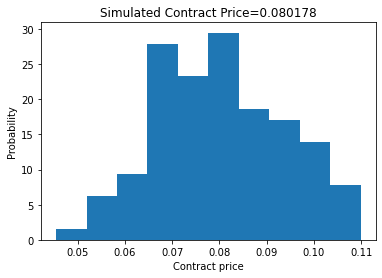

In [11]:
plt.hist(pricehistavg, density=True, bins=10)  
price=np.mean(pricehistavg)
plt.title('Simulated Contract Price=%f' %price)
plt.ylabel('Probability')
plt.xlabel('Contract price')
plt.savefig("Simulated Contract Price1.png")

In [49]:
strikesensitivity=[]
Num=3000
T=3
for i in range(10):
    k=0.5+i*0.2
    pricesensitivity=pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0,ytm1,S0,rf,q,k,T)
    strikesensitivity.append(pricesensitivity)

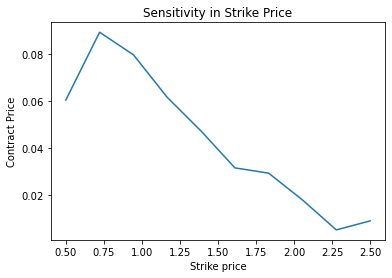

In [50]:
k=np.linspace(0.5,2.5,10)
plt.plot(k,strikesensitivity)  
price=np.mean(pricesensitivity)
plt.title('Sensitivity in Strike Price')
plt.ylabel('Contract Price')
plt.xlabel('Strike price')
plt.savefig("Sensitivity in Strike.png")

In [23]:
Num=3000
k=1
Timesensitivity=[]
Timesensitivity.append(pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0,ytm1,S0,rf,q,k,1))
Timesensitivity.append(pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0,ytm1,S0,rf,q,k,2))
Timesensitivity.append(pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0,ytm1,S0,rf,q,k,3))
Timesensitivity.append(pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0,ytm1,S0,rf,q,k,4))
Timesensitivity.append(pricing(Num,sigma_x,sigma_s,sigma_L,cor_sL,a,L0,ytm1,S0,rf,q,k,5))

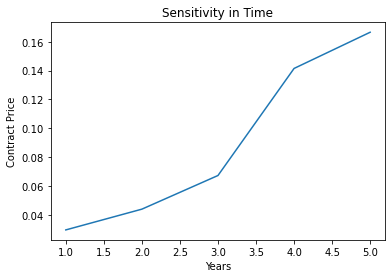

In [24]:
T=np.linspace(1,5,5)
plt.plot(T,Timesensitivity)  
price=np.mean(pricesensitivity)
plt.title('Sensitivity in Time')
plt.ylabel('Contract Price')
plt.xlabel('Years')
plt.savefig("Sensitivity in Time.png")